#1.Loading Libraries


In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib
# %pip install plotly
# %pip install ipykernel
# %pip install nbformat
# %pip install --upgrade nbformat
# %pip install holoviews
# %pip install hvplot
# %pip install seaborn
# %pip install mlxtend
# %pip install xgboost

In [174]:
from sklearn.metrics import (
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    roc_curve,
    auc,
    log_loss
)
import os
import pandas as pd
# import hvplot.pandas
import numpy as np
import seaborn as sns
from pandas.api.types import is_integer_dtype, is_object_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import plotly.express as px
# for min_max scaling
# import mlxtend
# from mlxtend.preprocessing import minmax_scaling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2.Preprocessing

### 2.1 Loading dataset.

In [175]:
#Load the nba.csv file into a DataFrame.
# os.getcwd()

# from google.colab import drive
# drive.mount('/content/drive')

# os.chdir('/content/drive/MyDrive/AI_ML')

# Upload data
df = pd.read_csv('loan_data.csv')
df.head(3)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1


##Treat data types

In [176]:
df = df.astype({
    "person_age": np.dtype("int"),
    "person_gender": np.dtype("object"),
    "person_education": np.dtype("object"),
    "person_income": np.dtype("float"),
    "person_emp_exp": np.dtype("int"),
    "person_home_ownership": np.dtype("object"),
    "loan_amnt": np.dtype("float"),
    "loan_intent": np.dtype("object"),
    "loan_int_rate": np.dtype("float"),
    "loan_percent_income": np.dtype("float"),
    "cb_person_cred_hist_length": np.dtype("float"),
    "credit_score": np.dtype("int"),
    "previous_loan_defaults_on_file": np.dtype("object"),
    "loan_status": np.dtype("int")
})
df.dtypes

person_age                          int32
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int32
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int32
previous_loan_defaults_on_file     object
loan_status                         int32
dtype: object

#revisar os tipos

In [177]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


##2.2 Handling missing values

In [178]:
# Check if there is null values
if df.isnull().sum().sum() != 0:
  print(df.dropna(inplace=True))
  print('Duplicated Rows Removed!')
else:
  print('No Duplicated Rows in the dataset')

No Duplicated Rows in the dataset


In [179]:
# Separate categorical and numerical columns
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('categorical', categorical_val)
print('continuos', continous_val)


categorical ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status']
continuos ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


## 2.2.1 Fields

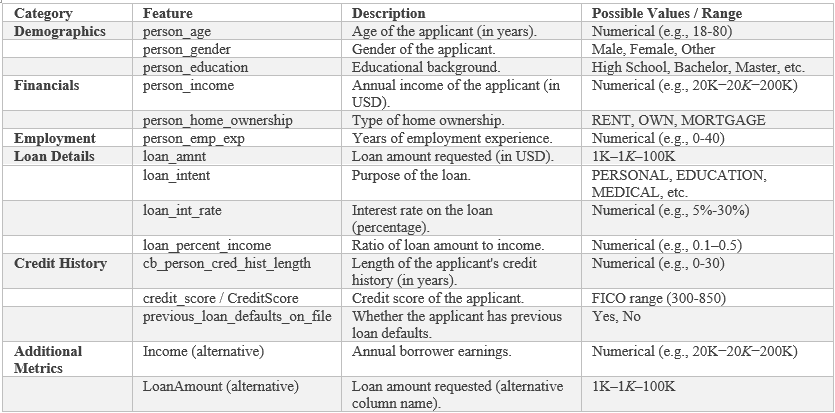

## 2.3 EDA

## Variável Qualitativa Nominal e Ordinal

In [180]:
var_cat_nominal = []
var_cat_ordinal = []
df_cat = df[categorical_val]
for column in df_cat.columns:
    if len(df_cat[column].unique()) != 2:
        var_cat_ordinal.append(column)
    else:
        var_cat_nominal.append(column)

print(var_cat_nominal)
print(var_cat_ordinal)

['person_gender', 'previous_loan_defaults_on_file', 'loan_status']
['person_education', 'person_home_ownership', 'loan_intent']


##Variável quantitativa discreta

In [181]:
var_quant_disc = []
var_quant_cont = []
df_num = df[continous_val]  # Make sure 'continuous_val' is defined and matches your DataFrame

for column in df_num.columns:
    if df_num[column].dtype == 'int64':  # Removed len() and the parentheses after dtype
        var_quant_disc.append(column)
    else:
        var_quant_cont.append(column)

# These variables weren't defined in your original code
# Make sure to define them before printing
print(var_quant_disc)  # This variable wasn't defined in your code
print(var_quant_cont)  # This variable wasn't defined in your code

[]
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


## Análise Univariada (target variable)

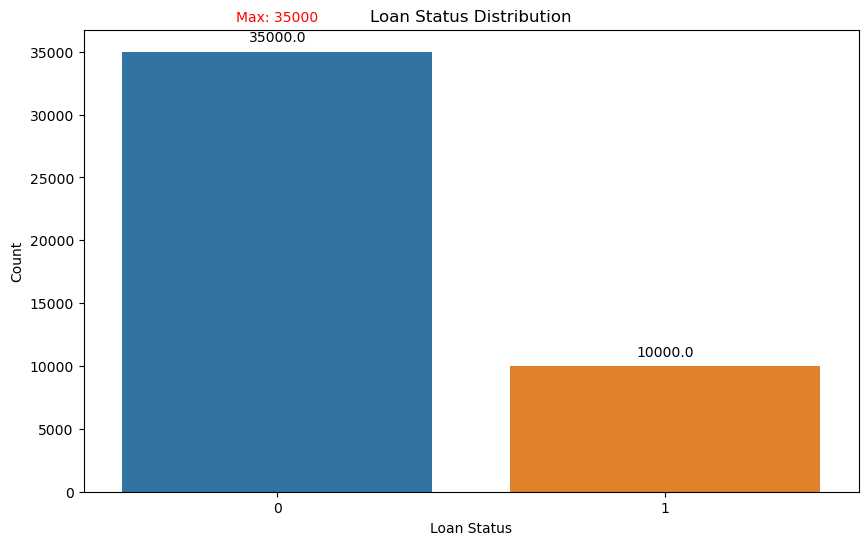

In [182]:
# prompt: bar graph of df['loan_status'] with label and max value

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'loan_status' is a column in it
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Find the maximum value and its corresponding label
max_value = df['loan_status'].value_counts().max()
max_label = df['loan_status'].value_counts().idxmax()


# Annotate the maximum value on the bar graph
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    if p.get_height() == max_value:
      plt.gca().annotate(f'Max: {max_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', xytext=(0, 20), textcoords='offset points', color='red')

plt.show()


There isn´t null values and all data is distinct.
We have 45,000 person in total, 35,000 didn´t pay the loan and 10,000 paid, so our problem is imbalanced.

##2.3**.1** Hypothesis

###H1: Renda - "O consumidor não conseguiu pagar porque as parcelas comprometiam mais de 30% da sua renda, somadas a outras dívidas."

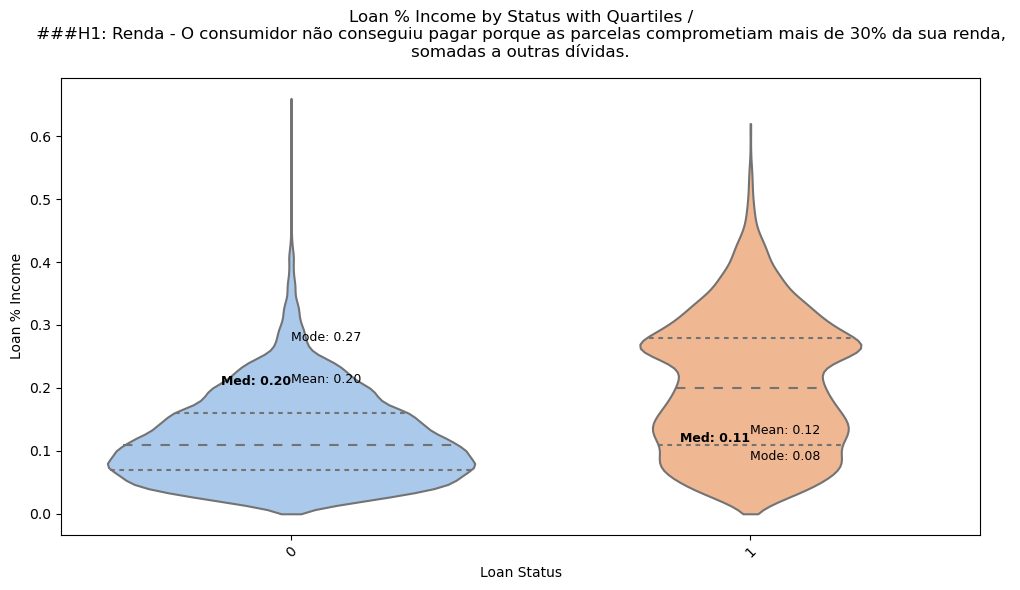

In [183]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    x="loan_status",
    y="loan_percent_income",
    data=df,
    palette="pastel",
    inner="quartile",  # Shows median and quartiles
    cut=0
)

# Add quartile annotations
for i, status in enumerate(df["loan_status"].unique()):
    # Get quartile values
    q1, median, q3 = np.percentile(
        df[df["loan_status"] == status]["loan_percent_income"],
        [25, 50, 75]
    )

    # Get additional statistics
    mean = df[df["loan_status"] == status]["loan_percent_income"].mean()
    mode = df[df["loan_status"] == status]["loan_percent_income"].mode().iloc[0]

    # Annotate on plot
    # ax.text(i, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', fontsize=9)
    ax.text(i, median, f'Med: {median:.2f}', ha='right', va='bottom', fontsize=9, fontweight='bold')
    # ax.text(i, q3, f'Q3: {q3:.2f}', ha='center', va='bottom', fontsize=9)
    ax.text(i, mean, f'Mean: {mean:.2f}', ha='left', va='bottom', fontsize=9)
    ax.text(i, mode, f'Mode: {mode:.2f}', ha='left', va='bottom', fontsize=9)

plt.title("Loan % Income by Status with Quartiles /\n ###H1: Renda - O consumidor não conseguiu pagar porque as parcelas comprometiam mais de 30% da sua renda, \nsomadas a outras dívidas.", pad=15)
plt.xlabel("Loan Status")
plt.ylabel("Loan % Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Comentário H1: Não se confirma a Hipótese 1 - Para o loan_status igual a zero, os valores na sua maioria estão abaixo de 30% da renda.

## H10: Histórico de crédito - "O cliente já estava superendividado antes de contrair o novo empréstimo, levando à inadimplência."

<Figure size 1800x1400 with 0 Axes>

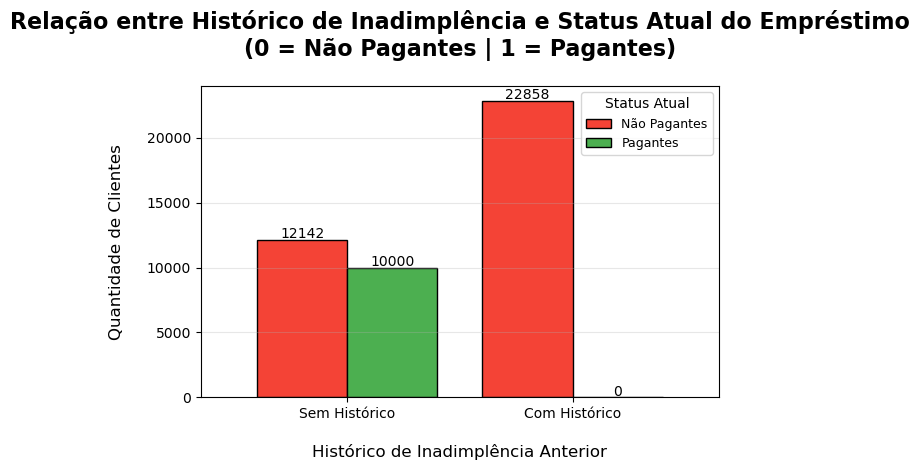

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))

# Criar e plotar tabela de contingência
contingency_table = pd.crosstab(
    df['previous_loan_defaults_on_file'],
    df['loan_status']
)

ax = contingency_table.plot(
    kind='bar',
    stacked=False,
    color=['#f44336', '#4caf50'],  # Vermelho para inadimplentes, verde para pagantes
    width=0.8,
    edgecolor='black'
)

# Adicionar valores absolutos
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 4),
        textcoords='offset points',
        fontsize=10
    )

# Configurações finais
plt.title("Relação entre Histórico de Inadimplência e Status Atual do Empréstimo\n(0 = Não Pagantes | 1 = Pagantes)", 
          pad=22, fontsize=16, fontweight='bold')
plt.xlabel('\nHistórico de Inadimplência Anterior', fontsize=12)
plt.ylabel('Quantidade de Clientes\n', fontsize=12)
plt.xticks(ticks=[0, 1], 
           labels=['Sem Histórico', 'Com Histórico'],
           rotation=0)
plt.legend(title='Status Atual', 
           labels=['Não Pagantes', 'Pagantes'],
           loc='upper right',
           fontsize=9)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## O gráfico sugere que não pagantes na sua maioria com histórico de inadimplência.  

## H20: Taxa de Juros - "Os juros altos, tem menor probabilidade de pagar?

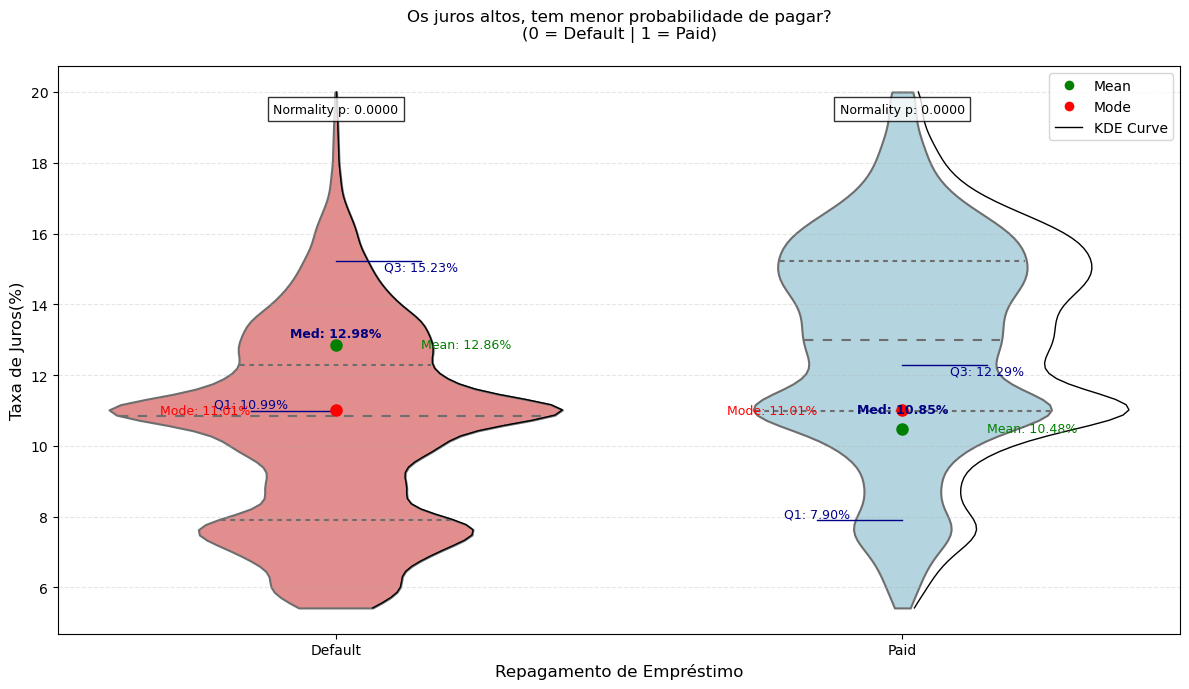

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 7))
ax = sns.violinplot(
    x="loan_status",
    y="loan_int_rate",
    data=df,
    palette={0: "lightcoral", 1: "lightblue"},
    inner="quartile",
    cut=0,
    bw_method=0.2  # Adjust bandwidth for smoother distribution
)

# Add distribution curves
for status in df["loan_status"].unique():
    subset = df[df["loan_status"] == status]["loan_int_rate"].dropna()
    kde = stats.gaussian_kde(subset)
    x_vals = np.linspace(subset.min(), subset.max(), 100)
    y_vals = kde(x_vals)
    ax.plot(status + y_vals/y_vals.max()*0.4, x_vals, color='black', lw=1)

# Annotation parameters
annotation_config = {
    'Q1': {'color': 'darkblue', 'va': 'bottom', 'ha': 'center'},
    'Med': {'color': 'navy', 'va': 'bottom', 'ha': 'center', 'fontweight': 'bold'},
    'Q3': {'color': 'darkblue', 'va': 'top', 'ha': 'center'},
    'Mean': {'color': 'green', 'va': 'bottom', 'ha': 'left'},
    'Mode': {'color': 'red', 'va': 'top', 'ha': 'right'}
}

for i, status in enumerate(df["loan_status"].unique()):
    subset = df[df["loan_status"] == status]["loan_int_rate"].dropna()
    
    # Calculate statistics
    q1, median, q3 = np.percentile(subset, [25, 50, 75])
    mean = subset.mean()
    mode = subset.mode().values[0]
    
    # Add annotations with connecting lines
    for label, value, offset in [('Q1', q1, -0.15), 
                                ('Med', median, 0), 
                                ('Q3', q3, 0.15)]:
        ax.plot([i + offset, i], [value, value], color=annotation_config[label]['color'], lw=1)
        ax.text(i + offset, value, f'{label}: {value:.2f}%', 
                **annotation_config[label], fontsize=9)

    # Add mean and mode
    ax.plot(i, mean, 'o', color='green', markersize=8)
    ax.plot(i, mode, 'o', color='red', markersize=8)
    ax.text(i + 0.15, mean, f'Mean: {mean:.2f}%', color='green', 
            va='center', fontsize=9)
    ax.text(i - 0.15, mode, f'Mode: {mode:.2f}%', color='red', 
            va='center', ha='right', fontsize=9)

# Add normality test results
for i, status in enumerate(df["loan_status"].unique()):
    subset = df[df["loan_status"] == status]["loan_int_rate"].dropna()
    _, p_value = stats.normaltest(subset)
    ax.text(i, ax.get_ylim()[1]*0.95, f'Normality p: {p_value:.4f}', 
            ha='center', va='top', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8))

plt.title("Os juros altos, tem menor probabilidade de pagar?\n(0 = Default | 1 = Paid)", pad=20)
plt.xlabel("Repagamento de Empréstimo", fontsize=12)
plt.ylabel("Taxa de Juros(%)", fontsize=12)
plt.xticks([0, 1], ["Default", "Paid"])
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Mean', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Mode', markerfacecolor='red', markersize=8),
    Line2D([0], [0], color='black', lw=1, label='KDE Curve')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

## Este gráfico sugere que existe uma correlação entre taxas de juros mais altas e menor probabilidade de pagamento, possivelmente porque juros elevados tornam as parcelas mais pesadas no orçamento dos clientes, aumentando o risco de inadimplência.

## H30: Pessoal - "Devido a uma emergência (como desemprego ou problema de saúde) que afetou a renda do cliente, levando à inadimplência."

<Figure size 2000x1400 with 0 Axes>

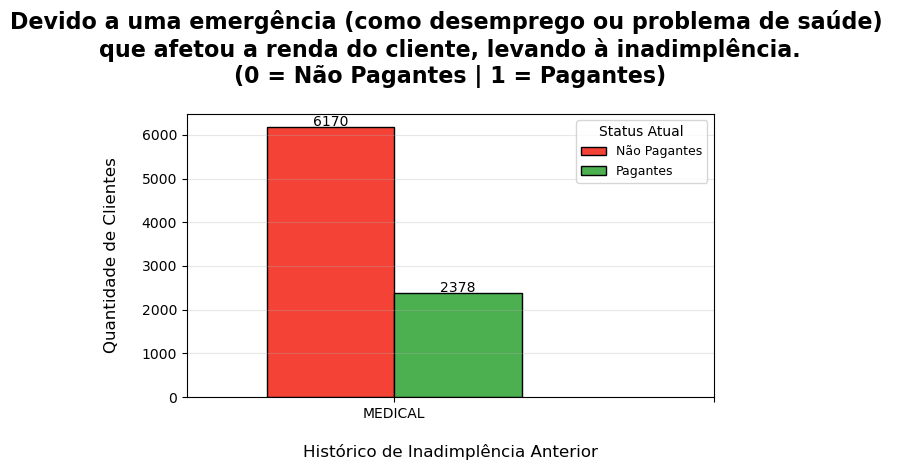

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 14))

# Filtrar apenas empréstimos médicos
medical_df = df[df['loan_intent'] == 'MEDICAL']

# Criar e plotar tabela de contingência
contingency_table = pd.crosstab(
    medical_df['loan_intent'],
    medical_df['loan_status']
)

ax = contingency_table.plot(
    kind='bar',
    stacked=False,
    color=['#f44336', '#4caf50'],  # Vermelho para inadimplentes, verde para pagantes
    width=0.8,
    edgecolor='black'
)

# Adicionar valores absolutos
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 4),
        textcoords='offset points',
        fontsize=10
    )

# Configurações finais
plt.title("Devido a uma emergência (como desemprego ou problema de saúde) \nque afetou a renda do cliente, levando à inadimplência.\n(0 = Não Pagantes | 1 = Pagantes)", 
          pad=22, fontsize=16, fontweight='bold')
plt.xlabel('\nHistórico de Inadimplência Anterior', fontsize=12)
plt.ylabel('Quantidade de Clientes\n', fontsize=12)
plt.xticks(ticks=[0, 1], rotation=0)
plt.legend(title='Status Atual', 
           labels=['Não Pagantes', 'Pagantes'],
           loc='upper right',
           fontsize=9)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## ## Este gráfico sugere que existe uma correlação entre taxas de juros mais altas e menor probabilidade de pagamento, possivelmente porque juros elevados tornam as parcelas mais pesadas no orçamento dos clientes, aumentando o risco de inadimplência.

## H31: Pessoal - "O consumidor não entendia os termos do contrato ou não calculou o impacto real das parcelas no seu orçamento."

##2.4  One Hot Encoding - Categorical Values

In [171]:
# One-hot encoding
df = pd.get_dummies(df,drop_first=True,dtype='int8')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  int32  
 1   person_income                       45000 non-null  float64
 2   person_emp_exp                      45000 non-null  int32  
 3   loan_amnt                           45000 non-null  float64
 4   loan_int_rate                       45000 non-null  float64
 5   loan_percent_income                 45000 non-null  float64
 6   cb_person_cred_hist_length          45000 non-null  float64
 7   credit_score                        45000 non-null  int32  
 8   loan_status                         45000 non-null  int32  
 9   person_gender_male                  45000 non-null  int8   
 10  person_education_Bachelor           45000 non-null  int8   
 11  person_education_Doctorate          45000

## 2.5 Analysing numerical variables

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a Pandas DataFrame named 'df'
# and 'continous_val' is a list of names of continuous columns
# and 'loan_status' is a column where 1 represents defaulted loans

# Filter the DataFrame for defaulted loans (loan_status == 1)
defaulted_df = df[df['loan_status'] == 1].copy() # Use .copy() to avoid SettingWithCopyWarning

# Calculate IQR bounds and analyze outliers only in defaulted loans
outlier_analysis = {}

for col in continous_val:
    # Calculate IQR bounds using ONLY the defaulted loans DataFrame
    Q1 = defaulted_df[col].quantile(0.25)
    Q3 = defaulted_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in defaulted loans
    is_outlier = (defaulted_df[col] < lower_bound) | (defaulted_df[col] > upper_bound)
    defaulted_outliers = defaulted_df[is_outlier]

    # Store results
    outlier_analysis[col] = {
        'Lower Bound (Defaulted)': lower_bound,
        'Upper Bound (Defaulted)': upper_bound,
        'Total Defaulted Loans': len(defaulted_df),
        'Defaulted Outliers': len(defaulted_outliers),
        'Outlier Percentage (%)': (len(defaulted_outliers)/len(defaulted_df))*100 if len(defaulted_df) > 0 else 0
    }

# Convert to DataFrame and display
results_df = pd.DataFrame(outlier_analysis).T
results_df = results_df[['Lower Bound (Defaulted)', 'Upper Bound (Defaulted)', 'Total Defaulted Loans',
                            'Defaulted Outliers', 'Outlier Percentage (%)']]
print(results_df.sort_values('Outlier Percentage (%)', ascending=False))

# Corrected way to get high-risk outliers based on IQR of defaulted loans
outlier_condition = (defaulted_df['loan_int_rate'] < defaulted_df['loan_int_rate'].quantile(0.25) - 1.5 * (defaulted_df['loan_int_rate'].quantile(0.75) - defaulted_df['loan_int_rate'].quantile(0.25))) | \
                    (defaulted_df['loan_int_rate'] > defaulted_df['loan_int_rate'].quantile(0.75) + 1.5 * (defaulted_df['loan_int_rate'].quantile(0.75) - defaulted_df['loan_int_rate'].quantile(0.25)))

high_risk_outliers = defaulted_df[outlier_condition][['loan_int_rate', 'loan_status']]

print(f"\nHigh-risk outliers (defaulted loans with extreme interest rates):\n{high_risk_outliers.head()}")

                            Lower Bound (Defaulted)  Upper Bound (Defaulted)  \
person_income                             -15728.00                124458.00   
person_age                                    12.50                    40.50   
person_emp_exp                                -9.50                    18.50   
cb_person_cred_hist_length                    -4.50                    15.50   
credit_score                                 499.00                   771.00   
loan_amnt                                 -10000.00                 30000.00   
loan_percent_income                           -0.15                     0.54   
loan_int_rate                                  4.63                    21.59   

                            Total Defaulted Loans  Defaulted Outliers  \
person_income                            10000.00              516.00   
person_age                               10000.00              395.00   
person_emp_exp                           10000.00           

<Axes: xlabel='person_age', ylabel='person_emp_exp'>

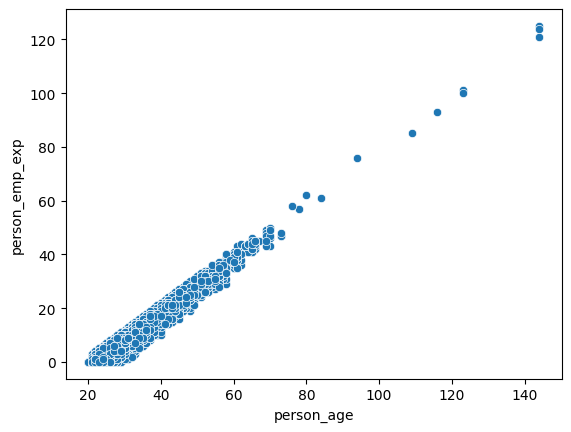

In [ ]:
sns.scatterplot(x=df['person_age'], y=df['person_emp_exp'])

In [ ]:
# Cleaning the person_age field
df = df[df['person_age']<= 100]
df = df[df['person_emp_exp']<= 60]


print(df.head(4))

   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0       22.00       71948.00               0   35000.00          16.02   
1       21.00       12282.00               0    1000.00          11.14   
2       25.00       12438.00               3    5500.00          12.87   
3       23.00       79753.00               0   35000.00          15.23   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.49                        3.00           561            1   
1                 0.08                        2.00           504            0   
2                 0.44                        3.00           635            1   
3                 0.44                        2.00           675            1   

   person_gender_male  ...  person_education_Master  \
0                   0  ...                        1   
1                   0  ...                        0   
2                   0  ...                        0   
3  

<Axes: xlabel='person_age', ylabel='person_emp_exp'>

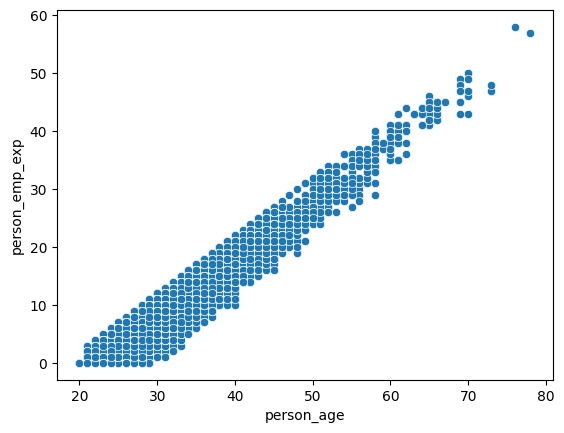

In [ ]:
sns.scatterplot(x=df['person_age'], y=df['person_emp_exp'])

<Axes: >

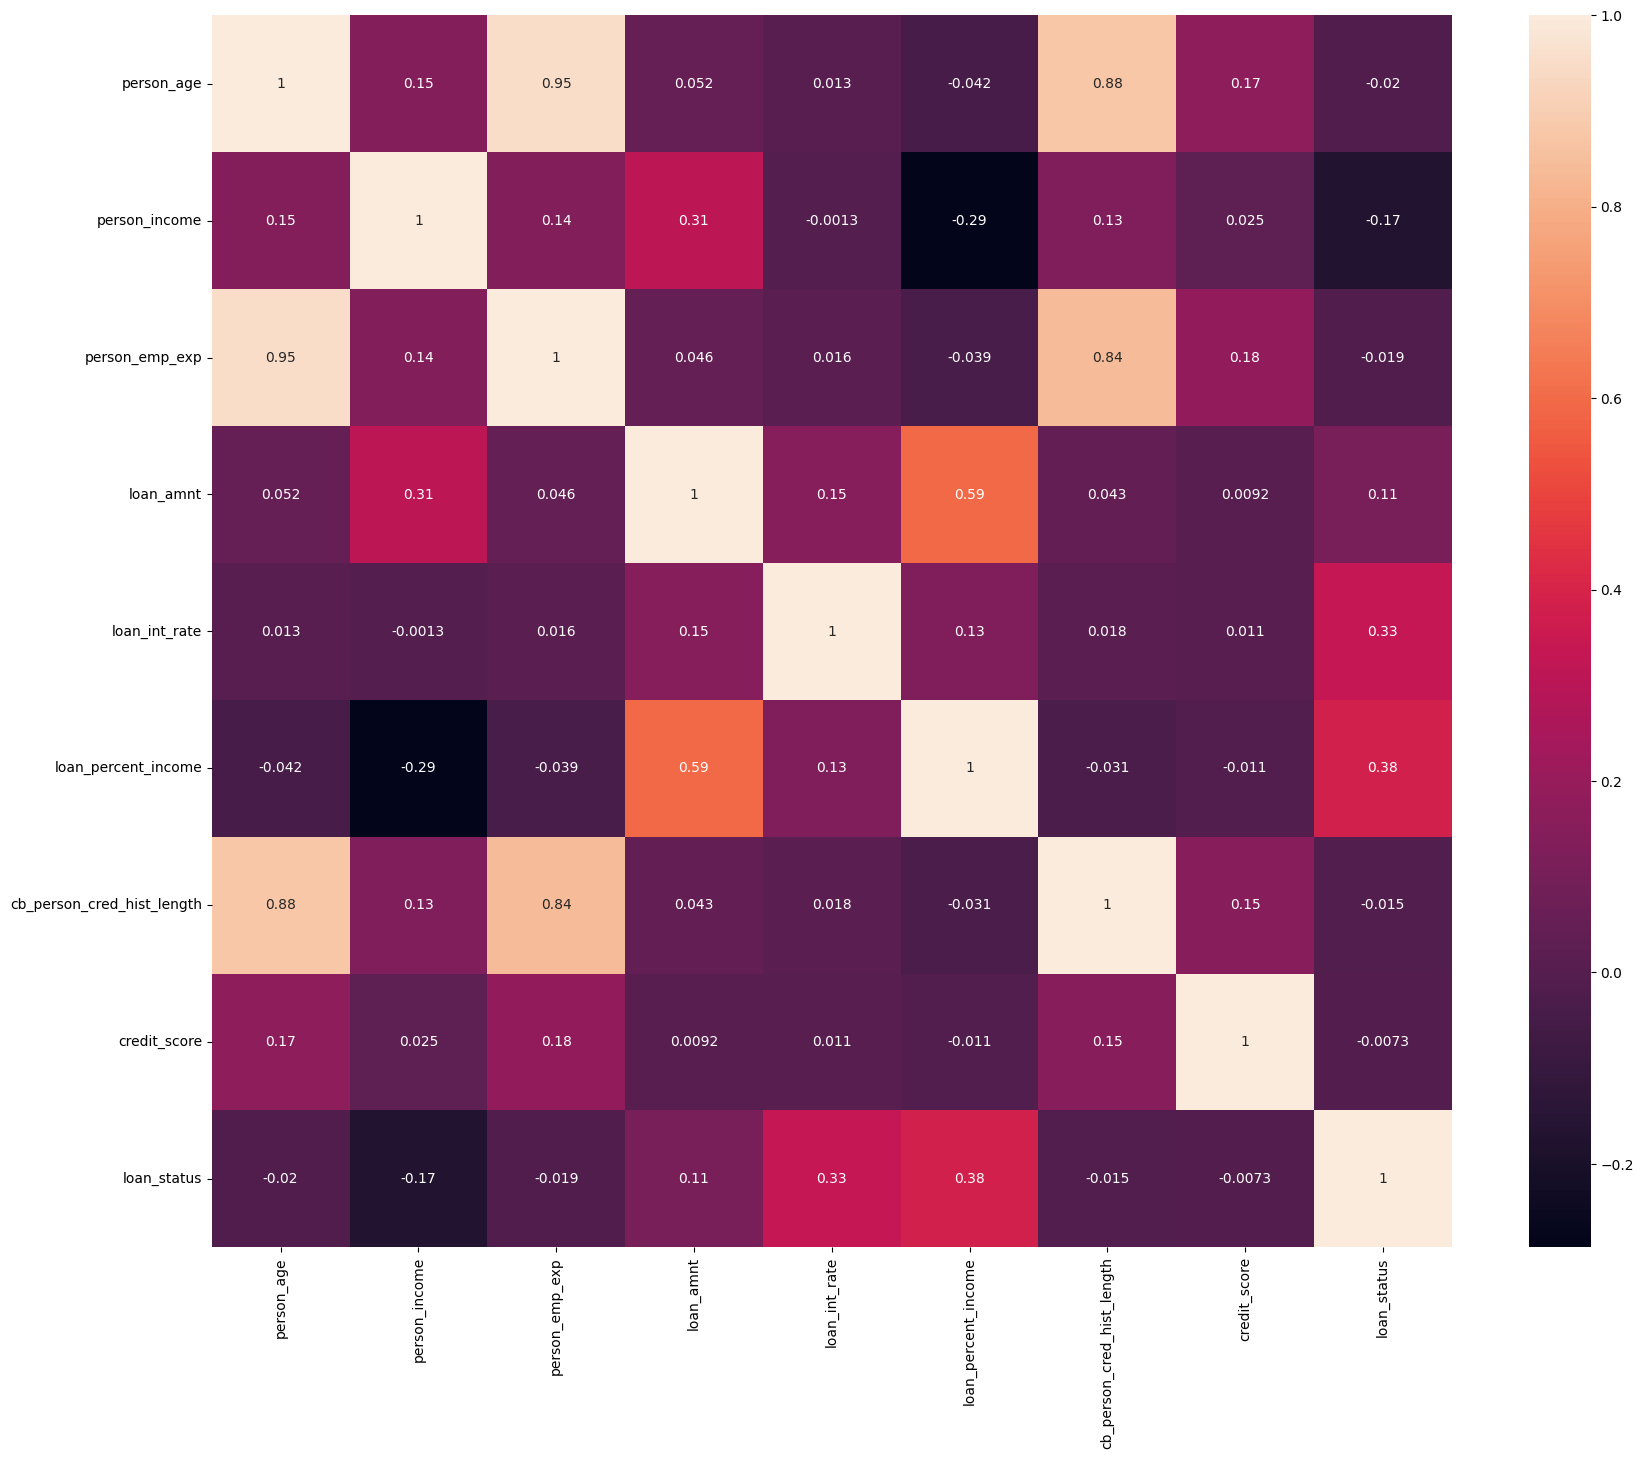

In [ ]:
# Plotting the Correlation Matrix

num_varibles = df.select_dtypes(include = ['float64', 'int'])
plt.figure(figsize=(20, 16))
cor_mat = num_varibles.corr()
sns.heatmap(data=cor_mat, annot=True)

## 2.6 It seems the data is durty, I could find a person with 144 years old. So I assumed that only people less or equal 100 years would be considered in this dataset.
## Also removed people above 60 years of experience, because it seems a wrong fulfilled data.  

             Total_Amount  Average_Amount  Number_of_Loans  \
loan_status                                                  
0            322595674.00         9219.65            34990   
1            108556898.00        10855.69            10000   

             Percentage_of_Total  
loan_status                       
0                          74.82  
1                          25.18  


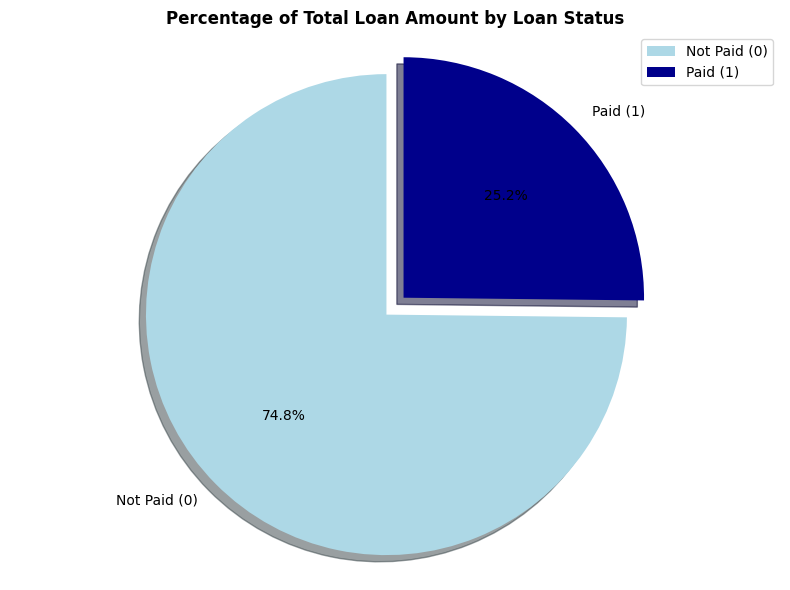

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by loan_status and calculate metrics
amount_by_status = df.groupby('loan_status')['loan_amnt'].agg(['sum', 'mean', 'count'])
amount_by_status.columns = ['Total_Amount', 'Average_Amount', 'Number_of_Loans']

# Calculate percentage of total amount
total_loan_amount = amount_by_status['Total_Amount'].sum()
amount_by_status['Percentage_of_Total'] = (amount_by_status['Total_Amount'] / total_loan_amount) * 100

# Round percentages
amount_by_status['Percentage_of_Total'] = amount_by_status['Percentage_of_Total'].round(2)

# Print the table
print(amount_by_status)

# --- PIE CHART ---
plt.figure(figsize=(8, 6))
colors = ['#ADD8E6','#00008B']
labels = ['Not Paid (0)', 'Paid (1)']
sizes = amount_by_status['Percentage_of_Total']

# Plot
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Show percentages on slices
    startangle=90,       # Rotate pie for better readability
    shadow=True,         # Add shadow for depth
    explode=(0.05, 0.05) # Slightly separate slices
)

# Add title and legend
plt.title('Percentage of Total Loan Amount by Loan Status', fontweight='bold')
plt.legend(labels, loc="best")

# Equal aspect ratio ensures pie is circular
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

## 2.7 Training, test and validation
## Random_state in your splitting functions for reproducibility.

In [ ]:
# Drop target column
X = df.drop(columns=['loan_status'], axis=1)

# Dataframe is only the target field
y = df['loan_status']
# print(y.describe())

# First split: 70% train, 30% temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=27,
    stratify=y  # Preserve class ratios
)

# Second split: 50% of temp -> 15% val, 15% test (of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=27,
    stratify=y_temp  # Stratify on the temporary split
)

# Verify sizes
print(f"Train: {len(X_train)} samples ({len(X_train)/len(X):.0%})")
print(f"Val:   {len(X_val)} samples ({len(X_val)/len(X):.0%})")
print(f"Test:  {len(X_test)} samples ({len(X_test)/len(X):.0%})")

# Verify class distribution
def check_distribution(y_data, name):
    classes, counts = np.unique(y_data, return_counts=True)
    print(f"\n{name} class distribution:")
    for cls, count in zip(classes, counts):
        print(f"Class {cls}: {count} samples ({count/len(y_data):.1%})")

check_distribution(y_train, "Training")
check_distribution(y_val, "Validation")
check_distribution(y_test, "Test")

Train: 31493 samples (70%)
Val:   6748 samples (15%)
Test:  6749 samples (15%)

Training class distribution:
Class 0: 24493 samples (77.8%)
Class 1: 7000 samples (22.2%)

Validation class distribution:
Class 0: 5248 samples (77.8%)
Class 1: 1500 samples (22.2%)

Test class distribution:
Class 0: 5249 samples (77.8%)
Class 1: 1500 samples (22.2%)


##2.8 Scale the Data (Logistic Regressin and KNN only)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data



#3.Model Deployment

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
def evaluate_model(y_true, y_pred, y_proba=None):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
    }
    if y_proba is not None:  # Only if the model supports predict_proba
        metrics["ROC-AUC"] = roc_auc_score(y_true, y_proba[:, 1])  # Use probabilities of the positive class
        metrics["Log Loss"] = log_loss(y_true, y_proba)
    return metrics

##3.1 Logistic Regression - Training and results

In [ ]:
# Implement a Logistic Regression Mode on the training data
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_scaled, y_train) #Inserted scaled data

LogisticRegression(solver='liblinear')

In [ ]:
# Get predicted class labels
y_pred = log_reg.predict(X_test_scaled)

# Get predicted probabilities (for ROC-AUC and Log Loss)
y_proba = log_reg.predict_proba(X_test_scaled)  # Shape: (n_samples, 2) for binary classification

# Evaluate
results = evaluate_model(y_test, y_pred, y_proba)
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8944
Precision: 0.7668
Recall: 0.7540
F1-Score: 0.7603
ROC-AUC: 0.9522
Log Loss: 0.2257


##3.2 K_Nearest Neighbor - Training and results

In [ ]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn.fit(X_train_scaled, y_train)

# Get predictions and probabilities
y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)  # KNN supports predict_proba!

# Evaluate
results = evaluate_model(y_test, y_pred, y_proba)
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8865
Precision: 0.7785
Recall: 0.6840
F1-Score: 0.7282
ROC-AUC: 0.9178
Log Loss: 0.7979


In [ ]:
# Train SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred = svr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('SVR model')
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

SVR model
MSE: 0.1498
MAE: 0.2443
R² Score: 0.1335


##3.3 Decision Tree Classifier - Training and results

In [ ]:
# Implement a Decision Tree Classifier Model on the training data
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
y_proba = dec_tree.predict_proba(X_test)  # Shape: (n_samples, n_classes)

# Evaluate
results = evaluate_model(y_test, y_pred, y_proba)
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9007
Precision: 0.7698
Recall: 0.7893
F1-Score: 0.7795
ROC-AUC: 0.8609
Log Loss: 3.5782


##3.4 Randon Forest - Training and results

In [ ]:
# Implement a Random Forest Model on the training data
rand_for = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_for.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Get predictions and probabilities
y_pred = rand_for.predict(X_test)
y_proba = rand_for.predict_proba(X_test)  # Shape: (n_samples, n_classes)

# Evaluate
results = evaluate_model(y_test, y_pred, y_proba)
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9272
Precision: 0.8884
Recall: 0.7693
F1-Score: 0.8246
ROC-AUC: 0.9722
Log Loss: 0.1766


##3.5 XGBoost Classifier - Training and results

In [ ]:
# Implement a XGBoost Classifier Model on the training data
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)
results = evaluate_model(y_test, y_pred, y_proba)

for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9198
Precision: 0.8603
Recall: 0.7633
F1-Score: 0.8089
ROC-AUC: 0.9688
Log Loss: 0.1800


# 4.Results

##4.1 Model Performance Comparison

Confusion Matrix:
 [[5180   69]
 [1325  175]]
Confusion Matrix:
 [[4836  413]
 [ 714  786]]
Confusion Matrix:
 [[4895  354]
 [ 316 1184]]
Confusion Matrix:
 [[5104  145]
 [ 346 1154]]
Confusion Matrix:
 [[5063  186]
 [ 355 1145]]

=== Model Performance Comparison ===

Logistic Regression:
Accuracy: 0.7935
F1-Score: 0.2007
ROC-AUC: 0.7740
Precision: 0.7172
Recall: 0.1167
PR-AUC: 0.5358

KNN:
Accuracy: 0.8330
F1-Score: 0.5824
ROC-AUC: 0.8200
Precision: 0.6555
Recall: 0.5240
PR-AUC: 0.6631

Decision Tree:
Accuracy: 0.9007
F1-Score: 0.7795
ROC-AUC: 0.8609
Precision: 0.7698
Recall: 0.7893
PR-AUC: 0.8030

Random Forest:
Accuracy: 0.9272
F1-Score: 0.8246
ROC-AUC: 0.9722
Precision: 0.8884
Recall: 0.7693
PR-AUC: 0.9246

XGBoost:
Accuracy: 0.9198
F1-Score: 0.8089
ROC-AUC: 0.9688
Precision: 0.8603
Recall: 0.7633
PR-AUC: 0.9154


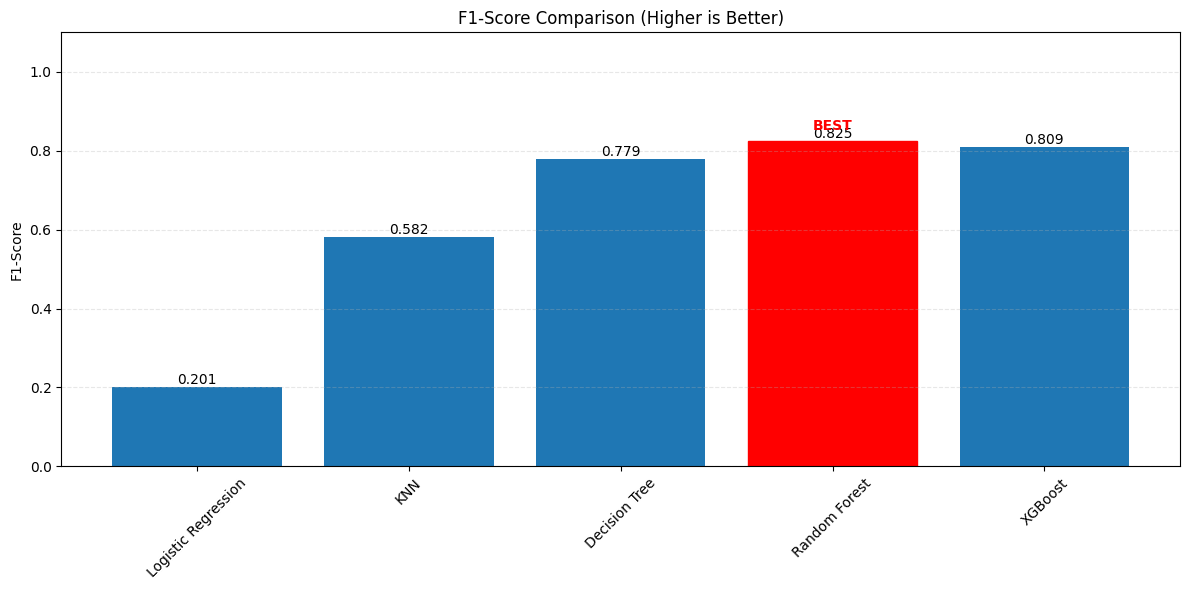

In [ ]:
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                           precision_score, recall_score, precision_recall_curve, auc)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Initialize models (example with default params)
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# 2. Train and evaluate all models
results = {}
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

    # Store metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

    # Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    results[name]['PR-AUC'] = auc(recall, precision)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # # Visualization
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
    #             xticklabels=['Predicted 0', 'Predicted 1'],
    #             yticklabels=['Actual 0', 'Actual 1'])
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')
    # plt.title('Confusion Matrix')
    # plt.show()

# 3. Print all results
print("\n=== Model Performance Comparison ===")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# 4. Visualization: F1-Score Comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(results.keys(), [v['F1-Score'] for v in results.values()])

# Highlight max F1-Score
max_f1 = max([v['F1-Score'] for v in results.values()])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')
    if height == max_f1:
        bar.set_color('red')
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                 'BEST',
                 ha='center', va='bottom', color='red', weight='bold')

plt.title("F1-Score Comparison (Higher is Better)")
plt.ylim(0, 1.1)
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##4.2 Evalution Metrics

### 4.2.1 Comments: High Accuracy (92.7%): The model is correct 93% of the time, making it reliable for general use. Business Impact: Reduces operational costs by minimizing manual verification needs.

## High ROC-AUC (97,2%): Near-perfect ability to distinguish between classes (97.2%). Business Impact: Trustworthy for ranking/scoring applications.

## High Precision (88.8%): 89% of predicted positives are correct (low false alarms). Business Impact: Ideal for: Spam filtering (few legitimate emails marked as spam). Fraud detection (minimizes unnecessary transaction blocks).



## 4.3 Factors Impact Most on the Results

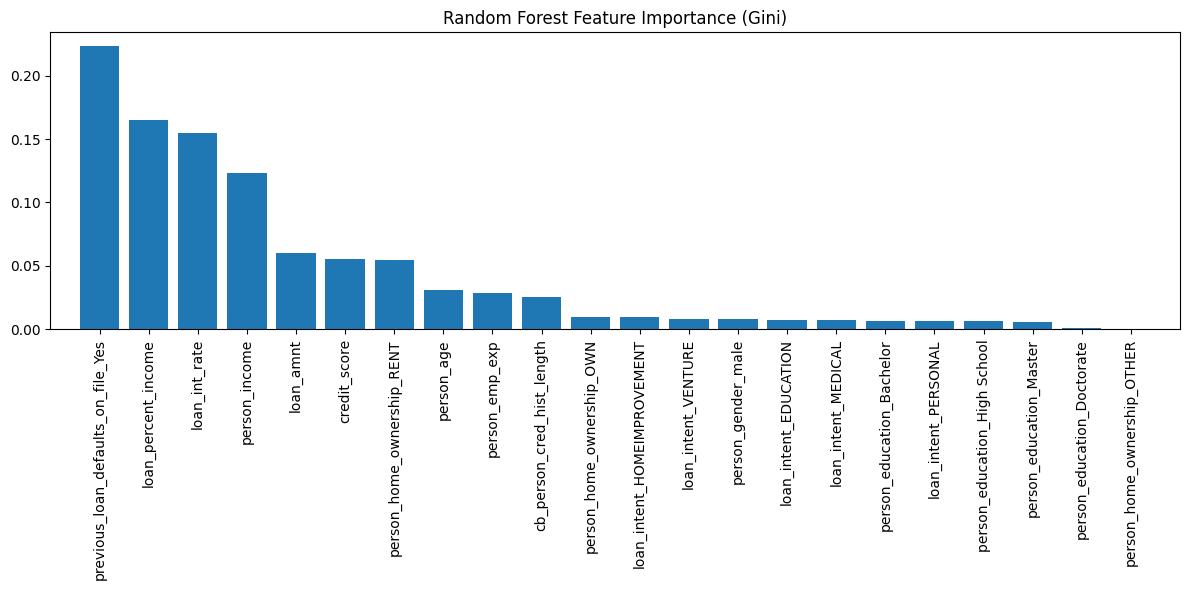

In [ ]:
# Get feature importances
importances = rand_for.feature_importances_
feature_names = X_train.columns  # Replace with your feature names

# Sort features
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importance (Gini)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

###4.3.1 The importance analysis using Randon Forest, which shows what factors impact most on the results.
## Three main factors are: Whether the applicant has previous loan defaults (Yes or No), ratio of loan amount to income and interest rate on the loan (percentage).